# ML Olympiad - Improving disaster response by amount aid prediction

The goals of this machine learning model is to predict the amount aid(USD) require to improve the response from governments and organizations when a disaster happened in the world country.

Depending of the disaster, some amount aids are quickly required to give a better response like supply foods, waters, drugs, shelters, vehicles...etc

In this work, we focused on some features to predict the amount aid which is our target. We started by cleaning data, find the missing values, transform the data and find the features. 

The ML problem we facing here is about regression, we want to predict a continuous variables which is 'amount_aid' 

So, we got our dataset from [EMT-DAT, the International Disaster Database.](https://www.emdat.be/)


# Python librairies importation and Data processing

In [1]:
# Import python librairies for data manipulation
import pandas as pd
import numpy as np
import os

# Import python librairies for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import python librairies for machine learning model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

In [2]:
# Read the dataset
df = pd.read_csv("em_dat.csv")
df = df.drop(['entry_date','last_update'], axis = 1)
df

,disno,historic,class_key,event_name,iso,origin,associ_types,ofda_response,appeal,decl,...,magni,magn_scale,lat,long,start_year,total_deaths,total_affec,total_damage,total_damadj,cpi
0,0,1,nat-cli-dro-dro,Betsy,29,121,1,0,0,0,...,222.0,Km2,36.5000,3.0000,1992,2.0,100000.0,200000.0,417135.0,47.946130
1,1,1,nat-cli-dro-dro,Betsy,109,121,1,0,0,0,...,222.0,Km2,36.5000,3.0000,1992,2.0,331500.0,200000.0,417135.0,47.946130
2,2,1,nat-met-sto-tro,Betsy,207,121,1,1,0,0,...,222.0,Kph,36.5000,3.0000,1992,2.0,10.0,200000.0,417135.0,47.946130
3,3,1,nat-hyd-flo-riv,Cerro Negro,151,121,1,0,0,0,...,7910.0,Km2,36.5000,3.0000,1992,18.0,600.0,200000.0,417135.0,47.946130
4,4,1,nat-met-sto-bli,Cerro Negro,104,121,1,0,0,0,...,12840.0,Kph,36.5000,3.0000,1992,25.0,104075.0,155000.0,323279.0,47.946130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,9121,0,nat-cli-dro-dro,Cyclone Vamco,70,74,49,0,0,0,...,65.0,Km2,-8.3381,124.8754,2015,11.0,63100.0,6750000.0,8334508.0,80.988579
9122,9122,0,nat-cli-dro-dro,Cyclone Vamco,170,74,49,1,0,1,...,65.0,Km2,-8.3381,124.8754,2015,11.0,6700000.0,6750000.0,8334508.0,80.988579
9123,9123,0,nat-cli-dro-dro,Cyclone Vamco,206,277,86,1,0,0,...,65.0,Km2,-8.3381,124.8754,2015,11.0,1750000.0,6750000.0,8334508.0,80.988579
9124,9124,0,nat-cli-dro-dro,Cyclone Vamco,85,84,86,0,0,0,...,65.0,Km2,-8.3381,124.8754,2015,11.0,330000000.0,3000000.0,3704226.0,80.988579


In [ ]:
#df.set_index("disno")

In [3]:
# Change the variables type
df[['amount_aid','magni','lat','long','total_deaths','total_affec','total_damage','total_damadj','cpi']].astype('int64')

,amount_aid,magni,lat,long,total_deaths,total_affec,total_damage,total_damadj,cpi
0,46,222,36,3,2,100000,200000,417135,47
1,46,222,36,3,2,331500,200000,417135,47
2,46,222,36,3,2,10,200000,417135,47
3,1160,7910,36,3,18,600,200000,417135,47
4,1160,12840,36,3,25,104075,155000,323279,47
...,...,...,...,...,...,...,...,...,...
9121,1015,65,-8,124,11,63100,6750000,8334508,80
9122,1015,65,-8,124,11,6700000,6750000,8334508,80
9123,1015,65,-8,124,11,1750000,6750000,8334508,80
9124,1015,65,-8,124,11,330000000,3000000,3704226,80


In [4]:
#Checking the columns type
df.dtypes

disno              int64
historic           int64
class_key         object
event_name        object
iso                int64
origin             int64
associ_types       int64
ofda_response      int64
appeal             int64
decl               int64
amount_aid       float64
magni            float64
magn_scale        object
lat              float64
long             float64
start_year         int64
total_deaths     float64
total_affec      float64
total_damage     float64
total_damadj     float64
cpi              float64
dtype: object

In [5]:
# Handling with categorical variables
encoder = LabelEncoder()
df['class_key'] = encoder.fit_transform(df['class_key'])
df['event_name'] = encoder.fit_transform(df['event_name'])
df['magn_scale'] = encoder.fit_transform(df['magn_scale'])

# Print the dataframe
print(df.head())

   disno  historic  class_key  event_name  iso  origin  associ_types  \
0      0         1          8          68   29     121             1   
1      1         1          8          68  109     121             1   
2      2         1         43          68  207     121             1   
3      3         1         25          93  151     121             1   
4      4         1         34          93  104     121             1   

   ofda_response  appeal  decl  ...    magni  magn_scale   lat  long  \
0              0       0     0  ...    222.0           0  36.5   3.0   
1              0       0     0  ...    222.0           0  36.5   3.0   
2              1       0     0  ...    222.0           1  36.5   3.0   
3              0       0     0  ...   7910.0           0  36.5   3.0   
4              0       0     0  ...  12840.0           1  36.5   3.0   

   start_year  total_deaths  total_affec  total_damage  total_damadj       cpi  
0        1992           2.0     100000.0      200000.

In [6]:
# Handling with missing data
df.isnull().sum()

disno            0
historic         0
class_key        0
event_name       0
iso              0
origin           0
associ_types     0
ofda_response    0
appeal           0
decl             0
amount_aid       0
magni            0
magn_scale       0
lat              0
long             0
start_year       0
total_deaths     0
total_affec      0
total_damage     0
total_damadj     0
cpi              0
dtype: int64

# Exploratory data analysis(EDA)

In [7]:
#Print a summary of the data in EMT-DAT
df.describe()

,disno,historic,class_key,event_name,iso,origin,associ_types,ofda_response,appeal,decl,...,magni,magn_scale,lat,long,start_year,total_deaths,total_affec,total_damage,total_damadj,cpi
count,9126.000000,9126.000000,9126.000000,9126.000000,9126.000000,9126.000000,9126.000000,9126.000000,9126.000000,9126.000000,...,9.126000e+03,9126.000000,9126.000000,9126.000000,9126.000000,9126.000000,9.126000e+03,9.126000e+03,9.126000e+03,9126.000000
mean,4562.500000,0.262437,24.352400,380.804843,103.925049,195.353276,56.113193,0.088757,0.018409,0.074512,...,4.717727e+04,0.898532,16.964338,36.454918,2004.127986,233.836730,6.865445e+05,7.558288e+05,1.139082e+06,65.638849
std,2634.593612,0.439983,12.662795,272.086253,63.624901,132.585863,22.083230,0.284409,0.134432,0.262617,...,3.395167e+05,1.167601,21.910418,80.915770,6.416012,3788.673636,7.365911e+06,5.473590e+06,8.104654e+06,9.891885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.700000e+01,0.000000,-72.640000,-178.252000,1992.000000,0.000000,1.000000e+00,2.000000e+00,2.000000e+00,47.946130
25%,2281.250000,0.000000,13.000000,109.000000,41.000000,121.000000,38.000000,0.000000,0.000000,0.000000,...,7.800000e+00,0.000000,-1.408000,-44.000000,1999.000000,4.000000,5.317500e+02,1.000000e+04,1.460000e+04,56.918587
50%,4562.500000,0.000000,25.000000,328.000000,94.000000,143.000000,69.000000,0.000000,0.000000,0.000000,...,1.900000e+02,1.000000,19.940000,49.946000,2004.000000,14.000000,5.000000e+03,6.000000e+04,9.490900e+04,64.541329
75%,6843.750000,1.000000,34.000000,601.000000,154.000000,319.000000,73.000000,0.000000,0.000000,0.000000,...,1.288100e+04,1.000000,37.103000,102.562000,2009.000000,42.000000,5.000000e+04,3.000000e+05,4.772630e+05,73.568746
max,9125.000000,1.000000,43.000000,902.000000,213.000000,526.000000,86.000000,1.000000,1.000000,1.000000,...,1.302587e+07,4.000000,67.930000,179.650000,2015.000000,222570.000000,3.300000e+08,2.100000e+08,2.732184e+08,80.988579


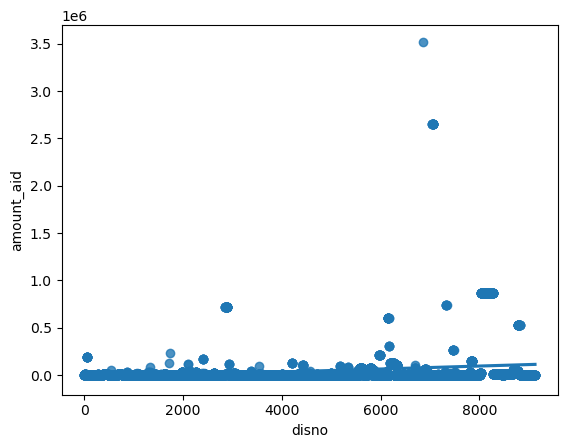

In [28]:
# Visualizing pairs of variables
sns.regplot(x="disno",y="amount_aid",data=df,ci=None)
plt.show()

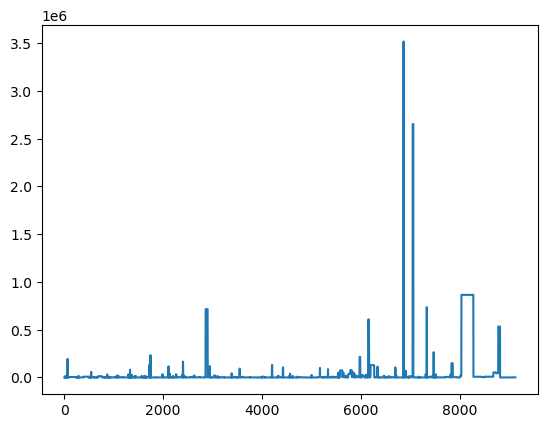

In [30]:
# Plot amount aid from df against disno
fix, ax = plt.subplots()
ax.plot(df["disno"],df['amount_aid'])
plt.show()

# Machine Learning model

In [31]:
#Create features and target arrays
X = df.drop('amount_aid', axis=1) # Features
y = df['amount_aid']  # Target variable

#Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Instantiate the scaler
scaler = StandardScaler()

#Scale the features: X_scaled
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Print the mean and standard deviation of the scaled and unscaled features
print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

disno            4.562500e+03
historic         2.624370e-01
class_key        2.435240e+01
event_name       3.808048e+02
iso              1.039250e+02
origin           1.953533e+02
associ_types     5.611319e+01
ofda_response    8.875740e-02
appeal           1.840894e-02
decl             7.451238e-02
magni            4.717727e+04
magn_scale       8.985317e-01
lat              1.696434e+01
long             3.645492e+01
start_year       2.004128e+03
total_deaths     2.338367e+02
total_affec      6.865445e+05
total_damage     7.558288e+05
total_damadj     1.139082e+06
cpi              6.563885e+01
dtype: float64 disno            2.634449e+03
historic         4.399589e-01
class_key        1.266210e+01
event_name       2.720713e+02
iso              6.362142e+01
origin           1.325786e+02
associ_types     2.208202e+01
ofda_response    2.843933e-01
appeal           1.344249e-01
decl             2.626029e-01
magni            3.394981e+05
magn_scale       1.167537e+00
lat              2.190922

D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


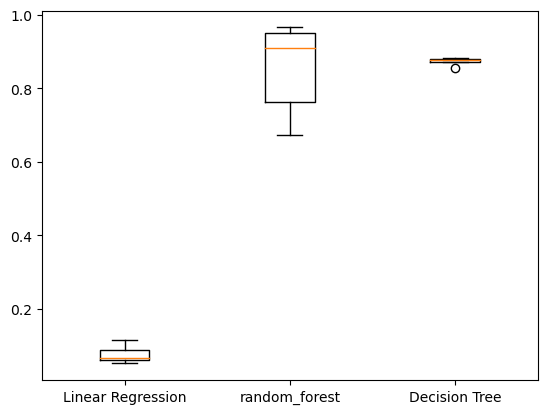

In [32]:
#Setup the pipeline model: model
models = {"Linear Regression": LinearRegression(),
          "random_forest": RandomForestRegressor(),
            "Decision Tree": DecisionTreeClassifier()}

results = []

#Evaluating regression models
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

#Show the results
plt.boxplot(results, labels=models.keys())
plt.show()

In [33]:
#Test set performance
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)

    print("{} Test Set Accuracy: {}".format(name, test_score))

Linear Regression Test Set Accuracy: 0.05261604656284746
random_forest Test Set Accuracy: 0.9293262537535961
Decision Tree Test Set Accuracy: 0.8817086527929902


In [52]:
#Compute predictions: y_pred
y.pred = model.predict(X_test_scaled) 
print(y_pred)

[5.00000e+01 7.55000e+02 2.50000e+01 ... 2.88000e+02 1.64100e+03
 1.28898e+05]
